In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

In [35]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/USJobPostings_raw00.csv'

In [37]:
da = pd.read_csv(filepath)
da.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Are you looking for a new job? Check out this ...,"['3 hours ago', 'Full-time', 'No degree mentio...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKFJpc2sgQW...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,1,1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,About Lumen\nLumen is guided by our belief tha...,"['17 hours ago', 'Full-time', 'No degree menti...",eyJqb2JfdGl0bGUiOiJEQVRBIEFOQUxZU1QgSUkiLCJodG...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint', 'sharepoint', 'power_b..."
2,2,2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,"Data Analyst Mason, Ohio With guidance from se...","['4 hours ago', 'Full-time', 'Health insurance...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBTd2lzc2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python', 'power_bi', 'sql', 'excel', 't..."
3,3,3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,REQ#: RQ135670 Travel Required: None Public Tr...,"['11 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBTZWNyZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['t-sql', 'pl/sql', 'sql']"
4,4,4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,"Address : 135 N Church Street, Spartanburg, So...","['20 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJDb2xsZWN0aW9ucyBEYXRhIEFuYW...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r', 'sas', 'sql']"


In [6]:
da.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

In [7]:
# Drop unneccesary columns
da = da.drop(columns=["Unnamed: 0", "index","job_id","commute_time","search_location","thumbnail","posted_at","search_term","date_time","extensions"])
da.head()

,title,company_name,location,via,description,schedule_type,work_from_home,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Are you looking for a new job? Check out this ...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,About Lumen\nLumen is guided by our belief tha...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint', 'sharepoint', 'power_b..."
2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,"Data Analyst Mason, Ohio With guidance from se...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python', 'power_bi', 'sql', 'excel', 't..."
3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,REQ#: RQ135670 Travel Required: None Public Tr...,Full-time,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['t-sql', 'pl/sql', 'sql']"
4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,"Address : 135 N Church Street, Spartanburg, So...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r', 'sas', 'sql']"


In [8]:
def extract_minimum_experience(description):
    regex_pattern = r'(\d+)(?:(?:-|–)\d+)?\s?years'
    match = re.search(regex_pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the function to the Description column
da['MinimumYears_Experience'] = da['description'].apply(extract_minimum_experience)

da.head(50)

,title,company_name,location,via,description,schedule_type,work_from_home,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,MinimumYears_Experience
0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Are you looking for a new job? Check out this ...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN
1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,About Lumen\nLumen is guided by our belief tha...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint', 'sharepoint', 'power_b...",NaN
2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,"Data Analyst Mason, Ohio With guidance from se...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python', 'power_bi', 'sql', 'excel', 't...",2.0
3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,REQ#: RQ135670 Travel Required: None Public Tr...,Full-time,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['t-sql', 'pl/sql', 'sql']",NaN
4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,"Address : 135 N Church Street, Spartanburg, So...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r', 'sas', 'sql']",2.0
5,Data Analyst / Bioinformatics Specialist,Oklahoma Medical Research Foundation (OMRF),United States,via Jobs Near Me,[ad_1]\n\nData Analyst / Bioinformatics Specia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN
6,Problem Management Business Data Analyst Intern,Centene Corporation,"Jefferson City, MO",via Lensa,You could be the one who changes everything fo...,Internship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN
7,Data Analyst - Fully Remote,Brigham & Women's Hospital(BWH),United States,via Job,Data Analyst - Fully Remote - (3216018)\n\nWHO...,Full-time,NaN,25 an hour,25,an hour,25.00,NaN,NaN,25.00,NaN,52000.0,"['python', 'excel', 'r', 'go', 'word']",NaN
8,Lead-Data Analyst,Edward Jones,"Sweet Springs, MO",via JobServe,"At Edward Jones, we help clients achieve their...",Full-time,NaN,"106,916–182,047 a year",106916–182047,a year,144481.50,106916.0,182047.0,NaN,144481.5,144481.5,[],NaN
9,"Sr. Data Analyst, Operations Data",Virgin Galactic,United States,via Virgin Galactic Careers,As a Sr. Operations Data Analyst you will supp...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'power_bi']",NaN


In [9]:
#concatenate all elements in the description_tokens list into a comma-separated string
da['description_clean'] = da['description_tokens'].apply(lambda x: str(x).replace('[','').replace(']','').replace('\'',''))
da.head()

,title,company_name,location,via,description,schedule_type,work_from_home,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,MinimumYears_Experience,description_clean
0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Are you looking for a new job? Check out this ...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,
1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,About Lumen\nLumen is guided by our belief tha...,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint', 'sharepoint', 'power_b...",NaN,"excel, powerpoint, sharepoint, power_bi, sql"
2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,"Data Analyst Mason, Ohio With guidance from se...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python', 'power_bi', 'sql', 'excel', 't...",2.0,"r, python, power_bi, sql, excel, tableau, word..."
3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,REQ#: RQ135670 Travel Required: None Public Tr...,Full-time,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['t-sql', 'pl/sql', 'sql']",NaN,"t-sql, pl/sql, sql"
4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,"Address : 135 N Church Street, Spartanburg, So...",Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r', 'sas', 'sql']",2.0,"python, r, sas, sql"


In [10]:
# replace NaN values with FALSE in the work_from_home column
da['work_from_home'].fillna('FALSE', inplace=True)
da.head()

,title,company_name,location,via,description,schedule_type,work_from_home,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,MinimumYears_Experience,description_clean
0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Are you looking for a new job? Check out this ...,Full-time,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,
1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,About Lumen\nLumen is guided by our belief tha...,Full-time,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint', 'sharepoint', 'power_b...",NaN,"excel, powerpoint, sharepoint, power_bi, sql"
2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,"Data Analyst Mason, Ohio With guidance from se...",Full-time,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python', 'power_bi', 'sql', 'excel', 't...",2.0,"r, python, power_bi, sql, excel, tableau, word..."
3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,REQ#: RQ135670 Travel Required: None Public Tr...,Full-time,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['t-sql', 'pl/sql', 'sql']",NaN,"t-sql, pl/sql, sql"
4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,"Address : 135 N Church Street, Spartanburg, So...",Full-time,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r', 'sas', 'sql']",2.0,"python, r, sas, sql"


In [11]:
# Cleanse salary_pay column
da[["salary_pay", "salary_rate"]] = da.salary.str.split(" ", 1, expand=True)
da.salary_pay = da.salary_pay.str.replace(",", "").str.replace("$", "").str.replace(" ", "")
da["salary_avg"] = np.where(da.salary_pay.str.contains("–"), np.NaN, da.salary_pay)
da["salary_min"] = np.where(da.salary_pay.str.contains("–"), da.salary_pay, np.NaN)
da[["salary_min", "salary_max"]] = da.salary_min.str.split("–", 1, expand=True)
for column in ["salary_avg", "salary_min", "salary_max"]:
    da[column] = np.where(da[column].str.contains("K"), da[column].str.replace("K", "").astype(float) * 1000 , da[column] )
da["salary_avg"] = np.where(~da.salary_min.isnull(), (da.salary_min.astype(float) + da.salary_max.astype(float))/2 , da.salary_avg)
da["salary_hourly"] = np.where(da.salary_rate == "an hour", da.salary_avg.astype(float), np.NaN)
da["salary_yearly"] = np.where(da.salary_rate == "a year", da.salary_avg.astype(float), np.NaN)
# Fill salary_standardized
da["salary_standardized"] = np.NaN
salary_rate = {"a year": 1, "an hour": 2080, "a month": 12}
for key, index in salary_rate.items():
    da.salary_standardized = np.where(da.salary_rate == key, da.salary_avg.astype(float) * index, da.salary_standardized)

# Check
cl = da[~da.salary.isnull()]
cl = cl[["salary", "salary_pay", "salary_rate", "salary_avg", "salary_min", "salary_max", "salary_standardized", "salary_hourly", "salary_yearly"]]
pd.set_option("display.max_rows", cl.shape[0]+1)
cl.head(10)

,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_standardized,salary_hourly,salary_yearly
7,25 an hour,25,an hour,25,NaN,None,52000.0,25.00,NaN
8,"106,916–182,047 a year",106916–182047,a year,144481.5,106916,182047,144481.5,NaN,144481.5
10,"106,916–182,047 a year",106916–182047,a year,144481.5,106916,182047,144481.5,NaN,144481.5
14,"106,916–182,047 a year",106916–182047,a year,144481.5,106916,182047,144481.5,NaN,144481.5
20,120K–140K a year,120K–140K,a year,130000.0,120000.0,140000.0,130000.0,NaN,130000.0
38,70.73 an hour,70.73,an hour,70.73,NaN,None,147118.4,70.73,NaN
39,"105,850–158,780 a year",105850–158780,a year,132315.0,105850,158780,132315.0,NaN,132315.0
58,60–80 an hour,60–80,an hour,70.0,60,80,145600.0,70.00,NaN
63,25–26 an hour,25–26,an hour,25.5,25,26,53040.0,25.50,NaN
70,25 an hour,25,an hour,25,NaN,None,52000.0,25.00,NaN


In [12]:
# Drop the existing columns in da
da = da.drop(columns=["salary", "salary_pay", "salary_rate", "salary_avg", "salary_min", "salary_max", "salary_standardized", "salary_hourly", "salary_yearly","description","description_tokens"])

# Concatenate salary_df to da
da = pd.concat([da, cl], axis=1)

In [13]:
da.head(50)

,title,company_name,location,via,schedule_type,work_from_home,MinimumYears_Experience,description_clean,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_standardized,salary_hourly,salary_yearly
0,Data Analyst (Risk Adjustment Consulting Resea...,"Cambia Health Solutions, Inc",United States,via Datafloq,Full-time,FALSE,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATA ANALYST II,Lumen,United States,via ComputerJobs.com,Full-time,FALSE,NaN,"excel, powerpoint, sharepoint, power_bi, sql",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Analyst - Swisslog,Swisslog,United States,via Swisslog,Full-time,FALSE,2.0,"r, python, power_bi, sql, excel, tableau, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Analyst - Secret clearance - Remote Remot...,General Dynamics Information Technology,Anywhere,via Clearance Jobs,Full-time,True,NaN,"t-sql, pl/sql, sql",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Collections Data Analyst (921071),Purpose Financial,United States,via Jobs At Purpose Financial / Advance Americ...,Full-time,FALSE,2.0,"python, r, sas, sql",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data Analyst / Bioinformatics Specialist,Oklahoma Medical Research Foundation (OMRF),United States,via Jobs Near Me,NaN,FALSE,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Problem Management Business Data Analyst Intern,Centene Corporation,"Jefferson City, MO",via Lensa,Internship,FALSE,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data Analyst - Fully Remote,Brigham & Women's Hospital(BWH),United States,via Job,Full-time,FALSE,NaN,"python, excel, r, go, word",25 an hour,25,an hour,25,NaN,None,52000.0,25.00,NaN
8,Lead-Data Analyst,Edward Jones,"Sweet Springs, MO",via JobServe,Full-time,FALSE,NaN,,"106,916–182,047 a year",106916–182047,a year,144481.5,106916,182047,144481.5,NaN,144481.5
9,"Sr. Data Analyst, Operations Data",Virgin Galactic,United States,via Virgin Galactic Careers,Full-time,FALSE,NaN,"excel, power_bi",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
da.dtypes

title                       object
company_name                object
location                    object
via                         object
schedule_type               object
work_from_home              object
MinimumYears_Experience    float64
description_clean           object
salary                      object
salary_pay                  object
salary_rate                 object
salary_avg                  object
salary_min                  object
salary_max                  object
salary_standardized        float64
salary_hourly              float64
salary_yearly              float64
dtype: object

In [ ]:
# Save the final dataset as an Excel file
cleansed_dataset = '/content/drive/My Drive/Colab Notebooks/Datasets/cleansed_dataset_USJobPostings.xlsx'
da.to_excel(cleansed_dataset, index=False)

In [15]:
from collections import Counter

# Convert the comma-separated values in description_clean to a list of words
words = [word for row in da['description_clean'] for word in row.split(', ')]

# Count the frequency of each word
word_count = Counter(words)

# Sort the results in descending order by frequency and get the top 10
top_words = word_count.most_common(10)

# Print the top 10 most occurred words
for word, count in top_words:
    print(word, count)

sql 7815
excel 5363
tableau 4198
python 4180
power_bi 4053
 2884
r 2744
sas 1520
word 1153
powerpoint 1147


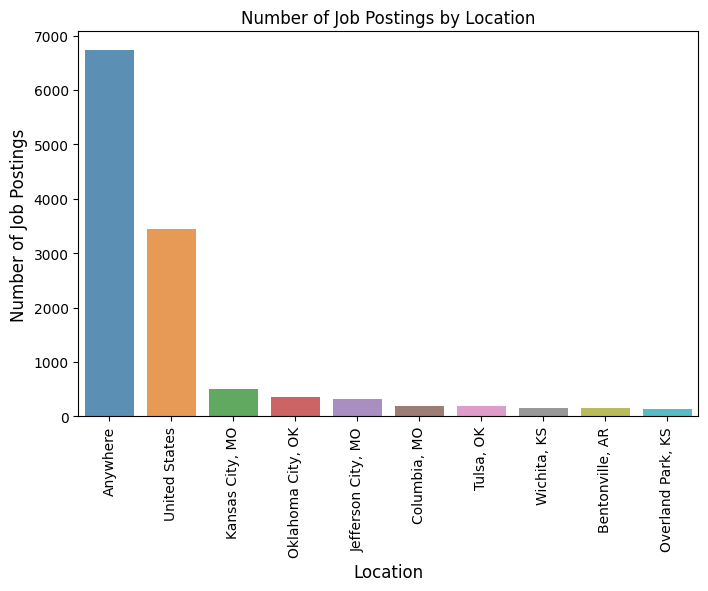

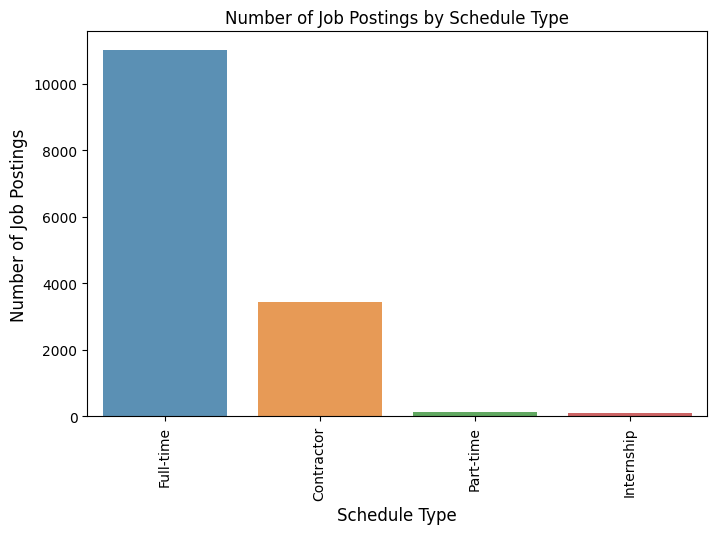

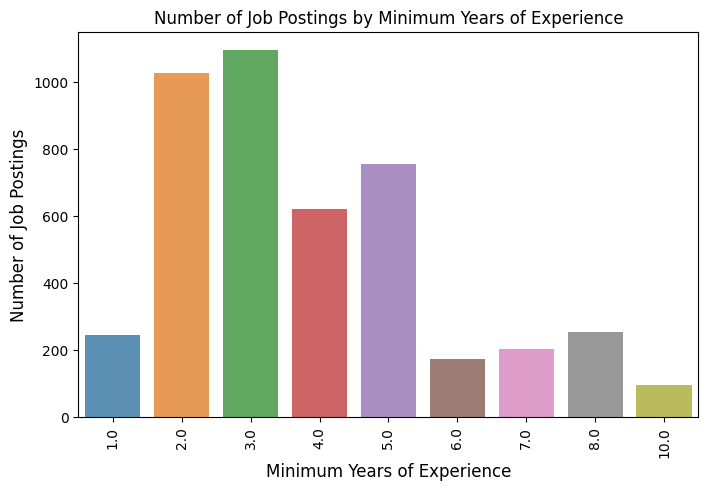

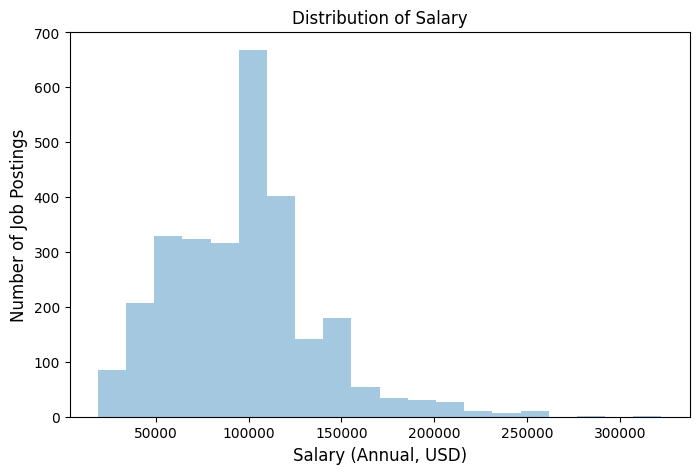

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of Job Postings by Location (Top 10)
location_counts = da['location'].value_counts()[:10]
plt.figure(figsize=(8,5))
sns.barplot(x=location_counts.index, y=location_counts.values, alpha=0.8)
plt.title('Number of Job Postings by Location')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Number of Job Postings by Schedule Type (Top 10)
schedule_counts = da['schedule_type'].value_counts()[:10]
plt.figure(figsize=(8,5))
sns.barplot(x=schedule_counts.index, y=schedule_counts.values, alpha=0.8)
plt.title('Number of Job Postings by Schedule Type')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Schedule Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Number of Job Postings by Minimum Years of Experience (Top 10)
exp_counts = da['MinimumYears_Experience'].value_counts()[:10]
plt.figure(figsize=(8,5))
sns.barplot(x=exp_counts.index, y=exp_counts.values, alpha=0.8)
plt.title('Number of Job Postings by Minimum Years of Experience')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Minimum Years of Experience', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Distribution of Salary
plt.figure(figsize=(8,5))
sns.distplot(da['salary_standardized'].dropna(), kde=False, bins=20)
plt.title('Distribution of Salary')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Salary (Annual, USD)', fontsize=12)
plt.show()


In [31]:
!pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


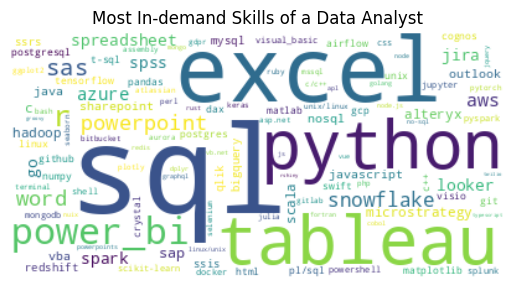

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Convert the comma-separated values in description_clean to a list of words
words = [word for row in da['description_clean'] for word in row.split(', ')]

# Count the frequency of each word
word_count = Counter(words)

# Generate the word cloud image
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_count)

# Set the title and axis labels
plt.title('Most In-demand Skills of a Data Analyst')
plt.xlabel('Word Frequency')
plt.ylabel('Word')

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

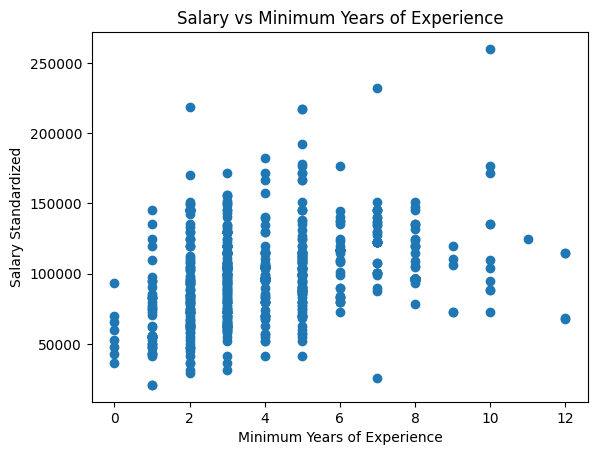

In [23]:
# filter the data to include only rows with MinimumYears_Experience less than 20
filtered_da = da[da['MinimumYears_Experience'] < 15]

# extract the MinimumYears_Experience and salary_standardized columns from the filtered data
MinimumYears_Experience = filtered_da['MinimumYears_Experience']
salary_standardized = filtered_da['salary_standardized']

# create a scatter plot
plt.scatter(MinimumYears_Experience, salary_standardized)

# add labels and title
plt.xlabel('Minimum Years of Experience')
plt.ylabel('Salary Standardized')
plt.title('Salary vs Minimum Years of Experience')

# show the plot
plt.show()

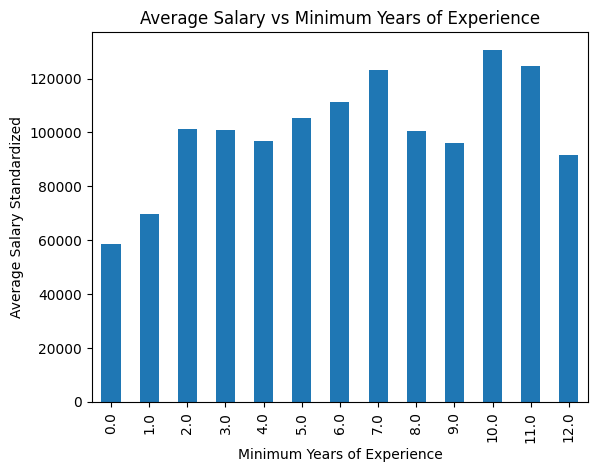

In [25]:
import pandas as pd

filtered_da = da[da['MinimumYears_Experience'] < 15]
grouped_da = filtered_da.groupby('MinimumYears_Experience')['salary_standardized'].mean()

grouped_da.plot(kind='bar')
plt.xlabel('Minimum Years of Experience')
plt.ylabel('Average Salary Standardized')
plt.title('Average Salary vs Minimum Years of Experience')
plt.show()